# Imports

In [1]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from string import ascii_uppercase
import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import random
from sklearn.neural_network import MLPClassifier
%matplotlib inline

# Load in Citizen Science Data

In [2]:
# Load the CSV into a pandas dataframe
data_path = os.path.join(os.getcwd(), '', 'citizenscience.csv')
citsci = pd.read_csv(data_path, delimiter = ',',  header=None, names=['user_id', 'timestamp'])

# Convert the timestamp to datetime
citsci['timestamp'] = pd.to_datetime(citsci['timestamp'])

In [4]:
# Describe the dataset
citsci.describe()

,user_id,timestamp
count,99999,99999
unique,943,13370
top,5050a6760454e27aae0026db,2014-12-29 21:38:00
freq,5531,69
first,NaN,2014-12-23 16:53:00
last,NaN,2015-01-05 17:33:00


In [69]:
# Inspect the first 5 rows of the dataset
citsci.head()

,user_id,timestamp,session_id,session_duration,idle_time,total_hits,will_churn
95970,4d5835cc2a82e278e6000028,2015-01-05 09:07:00,1,0.000000,0.000000,0.000000,False
95971,4d5835cc2a82e278e6000028,2015-01-05 09:07:00,1,0.000000,0.000000,0.001307,False
95972,4d5835cc2a82e278e6000028,2015-01-05 09:08:00,1,0.004651,0.033333,0.002614,False
96058,4d5835cc2a82e278e6000028,2015-01-05 09:33:00,1,0.120930,0.833333,0.003922,True
98712,4d5835cc2a82e278e6000028,2015-01-05 15:04:00,2,0.000000,0.000000,0.000000,False


In [7]:
# Sort the dataset by user_id and then timestamp
citsci = citsci.sort_values(['user_id', 'timestamp'])

# Group into Session Data

In [15]:
# Return the indices where two adjacent HITs have timestamps that are more than 30 minutes apart
gt_30min = citsci.timestamp.diff() > pd.datetools.timedelta(minutes=30)

/Users/thomascartwright/miniconda3/envs/ipp/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.core.datetools.timedelta is deprecated. Please use datetime.timedelta instead.
  """Entry point for launching an IPython kernel.


In [16]:
# Return the indices where two adjacent HITs have different user_ids
diff_user = citsci.user_id != citsci.user_id.shift()

In [17]:
# Any indice that appears in the above arrays signifies the end of a session
session_id = (diff_user | gt_30min).cumsum()

In [19]:
# Mark each HIT with a session_id
citsci['session_id'] = session_id

In [21]:
# Show some example HITs for a particular user
citsci[citsci['user_id'] == '508920379177d041ea003fd8']

,user_id,timestamp,session_id
12,508920379177d041ea003fd8,2014-12-23 16:53:00,301
16,508920379177d041ea003fd8,2014-12-23 16:53:00,301
21,508920379177d041ea003fd8,2014-12-23 16:53:00,301
44,508920379177d041ea003fd8,2014-12-23 16:54:00,301
612,508920379177d041ea003fd8,2014-12-23 17:10:00,301
698,508920379177d041ea003fd8,2014-12-23 17:25:00,301
7210,508920379177d041ea003fd8,2014-12-24 16:01:00,302
7211,508920379177d041ea003fd8,2014-12-24 16:01:00,302
7212,508920379177d041ea003fd8,2014-12-24 16:02:00,302
7213,508920379177d041ea003fd8,2014-12-24 16:02:00,302


# Add new columns to each HIT

Add field for session duration so far

In [22]:
session_duration = citsci['timestamp'] - citsci.groupby('session_id')['timestamp'].transform('first')
citsci['session_duration'] = session_duration.dt.seconds // 60

Add field for time since last HIT

In [23]:
idle_time = citsci.groupby('session_id')['timestamp'].diff().fillna(0)
citsci['idle_time'] = idle_time.dt.seconds // 60

Add field for number of HITs in this session

In [24]:
total_hits = citsci.groupby(["session_id"]).cumcount()
citsci['total_hits'] = total_hits

Add field for whether churn will occur in 5 minutes

In [25]:
will_churn = citsci.groupby('session_id')['timestamp'].transform('last') - citsci['timestamp']
will_churn = will_churn < datetime.timedelta(minutes=5)
citsci['will_churn'] = will_churn

Normalise the Data

In [26]:
citsci["session_duration"]=((citsci["session_duration"]-citsci["session_duration"].min())/(citsci["session_duration"].max()-citsci["session_duration"].min()))
citsci["idle_time"]=((citsci["idle_time"]-citsci["idle_time"].min())/(citsci["idle_time"].max()-citsci["idle_time"].min()))
citsci["total_hits"]=((citsci["total_hits"]-citsci["total_hits"].min())/(citsci["total_hits"].max()-citsci["total_hits"].min()))

Inspect the balance of the classes

In [71]:
citsci['will_churn'].describe()

count     99999
unique        2
top       False
freq      70095
Name: will_churn, dtype: object

From this we can see that roughly 70% of the HITs are not within 5 minutes of a churn event.

# Split Data into Train/Test

In [29]:
X = citsci[['session_duration', 'idle_time', 'total_hits']]
y = citsci['will_churn']

/Users/thomascartwright/miniconda3/envs/ipp/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, test_size=0.25, random_state=0)

# Confusion Matrix

In [38]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')

# Logistic Regression

In [31]:
# Initialise our logistic regression model
clf = LogisticRegression(random_state=0, solver='lbfgs', class_weight='balanced').fit(X_train, y_train)

In [34]:
# Get the logistic regression model's predictions for the classes
lr_pred = clf.predict(X_test)

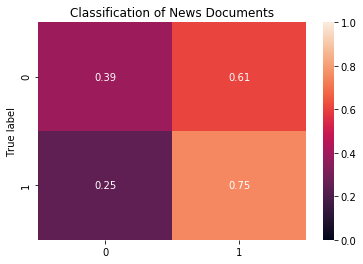

In [39]:
cm = confusion_matrix(y_test, lr_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

# Plot the confusion matrix as a heatmap
plt.figure()
plot_confusion_matrix(cm_norm, classes=['0', '1'])
plt.title("Classification of News Documents")
plt.show()

# Random Forest Classifier

In [35]:
# Fit our random forest classifier to the data using 3 estimators
rf = RandomForestClassifier(n_estimators=3, criterion='entropy', class_weight='balanced').fit(X_train, y_train)

/Users/thomascartwright/miniconda3/envs/ipp/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [75]:
# Make our predictions
rf_pred = rf.predict(X_train)

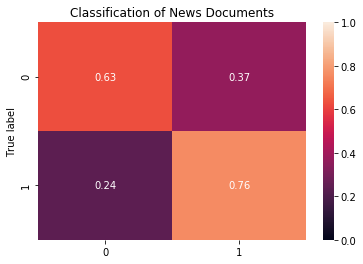

In [77]:
cm = confusion_matrix(y_train, rf_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

# Plot the confusion matrix as a heatmap
plt.figure()
plot_confusion_matrix(cm_norm, classes=['0', '1'])
plt.title("Classification of News Documents")
plt.show()

# Neural Network

First we need to balance the classes in our training set. We will do this by undersampling the HITs that have ```will_churn=0```

In [115]:
# Get all HITs that are going to churn
churn_X_train = X_train[y_train == 1]
churn_y_train = y_train[y_train == 1]

# Get all HITs that are not going to churn
stay_X_train = X_train[y_train == 0]
stay_y_train = y_train[y_train == 0]

# Sample a random number of HITs from the 'will not churn' group
random.seed(0)
sample_indices = random.sample(range(0, stay_X_train.shape[0]), churn_X_train.shape[0])
stay_X_train = stay_X_train.iloc[sample_indices]
stay_y_train = stay_y_train.iloc[sample_indices]

# Create a set of HITs that have balanced classes for will_churn
balanced_X_train = pd.concat([churn_X_train, stay_X_train])
balanced_y_train = pd.concat([churn_y_train, stay_y_train])

In [116]:
# Initialise our neural network
mlp = MLPClassifier(hidden_layer_sizes=(2, ), 
                    activation='logistic',
                    solver='sgd')
# Fit out neural network to the balanced classes
mlp.fit(balanced_X_train, balanced_y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(2,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [117]:
# Make our predictions on the test set
nn_pred = mlp.predict(X_train)

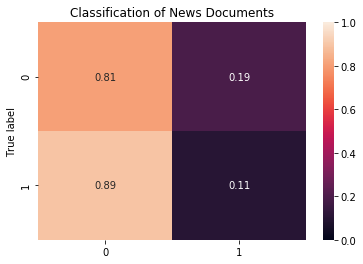

In [118]:
cm = confusion_matrix(y_train, nn_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

# Plot the confusion matrix as a heatmap
plt.figure()
plot_confusion_matrix(cm_norm, classes=['0', '1'])
plt.title("Classification of News Documents")
plt.show()